In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# seaborn plotting style
sns.set(style='ticks', context='poster')
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import style
style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [17]:
data = [['2016/10/9', 610.0, 584.0, 530.0, 488.0, 611.0, 590.0, 536.0, 489.0],
 ['2016/10/10', 612.0, 586.0, 531.0, 489.0, 613.0, 592.0, 537.0, 490.0],
 ['2016/10/11', 619.0, 593.0, 534.0, 492.0, 620.0, 599.0, 540.0, 493.0],
 ['2016/10/12', 622.0, 596.0, 538.0, 496.0, 623.0, 602.0, 544.0, 497.0],
 ['2016/10/13', 630.0, 604.0, 543.0, 501.0, 631.0, 610.0, 549.0, 502.0],
 ['2016/10/14', 635.0, 609.0, 548.0, 506.0, 636.0, 615.0, 554.0, 507.0],
 ['2016/10/17', 635.0, 609.0, 548.0, 506.0, 636.0, 615.0, 554.0, 507.0],
 ['2016/10/18', 638.0, 612.0, 550.0, 506.0, 639.0, 618.0, 556.0, 507.0],
 ['2016/10/19', 646.0, 620.0, 559.0, 510.0, 647.0, 626.0, 565.0, 511.0],
 ['2016/10/20', 654.0, 625.0, 564.0, 515.0, 652.0, 631.0, 570.0, 516.0],
 ['2016/10/21', 655.0, 629.0, 566.0, 517.0, 656.0, 635.0, 572.0, 518.0],
 ['2016/10/24', 668.0, 642.0, 579.0, 530.0, 669.0, 648.0, 585.0, 531.0],
 ['2016/10/25', 674.0, 648.0, 582.0, 533.0, 675.0, 654.0, 588.0, 534.0],
 ['2016/10/26', 674.0, 648.0, 586.0, 537.0, 675.0, 654.0, 592.0, 538.0],
 ['2016/10/27', 684.0, 658.0, 588.0, 539.0, 685.0, 664.0, 594.0, 540.0],
 ['2016/10/28', 685.0, 659.0, 588.0, 539.0, 686.0, 665.0, 594.0, 540.0],
 ['2016/10/31', 698.0, 672.0, 594.0, 545.0, 699.0, 678.0, 600.0, 546.0],
 ['2016/11/1', 713.0, 687.0, 608.0, 559.0, 714.0, 693.0, 614.0, 560.0],
 ['2016/11/2', 717.0, 691.0, 620.0, 571.0, 718.0, 697.0, 626.0, 572.0],
 ['2016/11/3', 730.0, 704.0, 625.0, 576.0, 731.0, 710.0, 631.0, 577.0],
 ['2016/11/4', 734.0, 708.0, 628.0, 579.0, 735.0, 714.0, 634.0, 580.0],
 ['2016/11/7', 743.0, 717.0, 645.0, 596.0, 744.0, 723.0, 651.0, 597.0],
 ['2016/11/8', 748.0, 722.0, 654.0, 605.0, 749.0, 728.0, 660.0, 606.0],
 ['2016/11/9', 758.0, 732.0, 653.0, 604.0, 759.0, 738.0, 659.0, 605.0],
 ['2016/11/10', 767.0, 741.0, 651.0, 602.0, 768.0, 747.0, 657.0, 603.0],
 ['2016/11/11', 762.0, 736.0, 657.0, 608.0, 763.0, 742.0, 663.0, 609.0],
 ['2016/11/14', 757.0, 731.0, 662.0, 613.0, 758.0, 737.0, 668.0, 614.0],
 ['2016/11/15', 759.0, 733.0, 659.0, 610.0, 760.0, 739.0, 665.0, 611.0],
 ['2016/11/16', 753.0, 727.0, 652.0, 603.0, 754.0, 733.0, 658.0, 604.0],
 ['2016/11/17', 733.0, 707.0, 629.0, 580.0, 734.0, 713.0, 635.0, 581.0],
 ['2016/11/18', 732.0, 706.0, 619.0, 570.0, 733.0, 712.0, 625.0, 571.0],
 ['2016/11/21', 724.0, 698.0, 611.0, 562.0, 725.0, 704.0, 617.0, 563.0],
 ['2016/11/22', 706.0, 680.0, 604.0, 555.0, 707.0, 686.0, 610.0, 556.0],
 ['2016/11/23', 706.0, 680.0, 604.0, 555.0, 707.0, 686.0, 610.0, 556.0],
 ['2016/11/24', 705.0, 679.0, 601.0, 552.0, 706.0, 685.0, 607.0, 553.0],
 ['2016/11/25', 705.0, 679.0, 601.0, 552.0, 706.0, 685.0, 607.0, 553.0],
 ['2016/11/28', 701.0, 675.0, 598.0, 549.0, 702.0, 681.0, 604.0, 550.0],
 ['2016/11/29', 694.0, 668.0, 592.0, 543.0, 695.0, 674.0, 598.0, 544.0],
 ['2016/11/30', 692.0, 666.0, 588.0, 539.0, 693.0, 672.0, 594.0, 540.0],
 ['2016/12/1', 692.0, 666.0, 588.0, 539.0, 693.0, 672.0, 594.0, 540.0],
 ['2016/12/2', 692.0, 666.0, 588.0, 539.0, 693.0, 672.0, 594.0, 540.0],
 ['2016/12/5', 684.0, 658.0, 581.0, 532.0, 685.0, 664.0, 587.0, 533.0],
 ['2016/12/6', 684.0, 658.0, 581.0, 532.0, 685.0, 664.0, 587.0, 533.0],
 ['2016/12/7', 680.0, 654.0, 581.0, 532.0, 681.0, 660.0, 587.0, 533.0],
 ['2016/12/8', 674.0, 648.0, 574.0, 525.0, 675.0, 654.0, 580.0, 526.0],
 ['2016/12/9', 670.0, 644.0, 574.0, 525.0, 671.0, 650.0, 580.0, 526.0],
 ['2016/12/12', 666.0, 640.0, 566.0, 517.0, 667.0, 646.0, 572.0, 518.0],
 ['2016/12/13', 664.0, 638.0, 566.0, 517.0, 665.0, 646.0, 572.0, 518.0],
 ['2016/12/14', 662.0, 636.0, 566.0, 517.0, 663.0, 642.0, 572.0, 518.0],
 ['2016/12/15', 660.0, 634.0, 564.0, 515.0, 661.0, 640.0, 570.0, 516.0],
 ['2016/12/16', 660.0, 634.0, 564.0, 515.0, 661.0, 640.0, 570.0, 516.0],
 ['2016/12/19', 656.0, 630.0, 561.0, 512.0, 657.0, 636.0, 567.0, 513.0],
 ['2016/12/20', 653.0, 627.0, 558.0, 509.0, 654.0, 633.0, 564.0, 510.0],
 ['2016/12/21', 650.0, 624.0, 554.0, 505.0, 651.0, 630.0, 560.0, 506.0],
 ['2016/12/22', 650.0, 624.0, 554.0, 505.0, 651.0, 630.0, 560.0, 506.0],
 ['2016/12/23', 650.0, 624.0, 554.0, 505.0, 651.0, 630.0, 560.0, 506.0],
 ['2016/12/26', 645.0, 619.0, 551.0, 502.0, 646.0, 625.0, 557.0, 503.0],
 ['2016/12/27', 643.0, 617.0, 550.0, 501.0, 644.0, 623.0, 556.0, 502.0],
 ['2016/12/28', 640.0, 614.0, 547.0, 498.0, 641.0, 620.0, 553.0, 499.0],
 ['2016/12/29', 637.0, 611.0, 544.0, 495.0, 638.0, 617.0, 550.0, 496.0],
 ['2016/12/30', 637.0, 611.0, 544.0, 495.0, 638.0, 617.0, 550.0, 496.0],
 ['2016/12/31', '', '', '', '', '', '', '', ''],
 ['2017/1/2', '', '', '', '', '', '', '', ''],
 ['2017/1/3', 635.0, 609.0, 541.0, 492.0, 636.0, 615.0, 547.0, 493.0],
 ['2017/1/4', 632.0, 606.0, 538.0, 489.0, 633.0, 612.0, 544.0, 490.0],
 ['2017/1/5', 629.0, 603.0, 534.0, 485.0, 630.0, 609.0, 540.0, 486.0],
 ['2017/1/6', 627.0, 601.0, 534.0, 485.0, 628.0, 607.0, 540.0, 486.0],
 ['2017/1/9', 627.0, 601.0, 534.0, 485.0, 628.0, 607.0, 540.0, 486.0],
 ['2017/1/10', 627.0, 601.0, 534.0, 485.0, 628.0, 607.0, 540.0, 486.0],
 ['2017/1/11', 625.0, 599.0, 534.0, 485.0, 626.0, 605.0, 540.0, 486.0],
 ['2017/1/12', 625.0, 599.0, 533.0, 484.0, 626.0, 605.0, 539.0, 485.0],
 ['2017/1/13', 624.0, 598.0, 533.0, 484.0, 625.0, 604.0, 539.0, 485.0],
 ['2017/1/16', 620.0, 594.0, 530.0, 481.0, 621.0, 600.0, 536.0, 482.0],
 ['2017/1/17', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/18', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/19', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/20', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/22', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/23', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/24', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/25', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/26', 623.0, 597.0, 532.0, 483.0, 624.0, 603.0, 538.0, 484.0],
 ['2017/1/27', '', '', '', '', '', '', '', ''],
 ['2017/1/30', '', '', '', '', '', '', '', ''],
 ['2017/1/31', '', '', '', '', '', '', '', ''],
 ['2017/2/1', '', '', '', '', '', '', '', ''],
 ['2017/2/2', '', '', '', '', '', '', '', ''],
 ['2017/2/3', 618.0, 592.0, 530.0, 481.0, 619.0, 598.0, 536.0, 482.0],
 ['2017/2/4', 618.0, 592.0, 530.0, 481.0, 619.0, 598.0, 536.0, 482.0],
 ['2017/2/6', 613.0, 587.0, 529.0, 480.0, 614.0, 593.0, 535.0, 481.0],
 ['2017/2/7', 613.0, 587.0, 526.0, 477.0, 614.0, 593.0, 532.0, 478.0],
 ['2017/2/8', 613.0, 587.0, 526.0, 477.0, 614.0, 593.0, 532.0, 478.0],
 ['2017/2/9', 612.0, 586.0, 524.0, 475.0, 613.0, 592.0, 530.0, 476.0],
 ['2017/2/10', 612.0, 586.0, 524.0, 475.0, 613.0, 592.0, 530.0, 476.0],
 ['2017/2/13', 610.0, 584.0, 524.0, 475.0, 611.0, 590.0, 530.0, 476.0],
 ['2017/2/14', 610.0, 584.0, 524.0, 475.0, 611.0, 590.0, 530.0, 476.0],
 ['2017/2/15', 610.0, 584.0, 525.0, 476.0, 611.0, 590.0, 531.0, 477.0],
 ['2017/2/16', 610.0, 584.0, 525.0, 476.0, 611.0, 590.0, 531.0, 477.0],
 ['2017/2/17', 612.0, 586.0, 527.0, 478.0, 613.0, 592.0, 533.0, 479.0],
 ['2017/2/20', 618.0, 592.0, 531.0, 482.0, 619.0, 598.0, 537.0, 483.0],
 ['2017/2/21', 622.0, 596.0, 534.0, 485.0, 623.0, 602.0, 540.0, 486.0],
 ['2017/2/22', 625.0, 599.0, 540.0, 491.0, 626.0, 605.0, 546.0, 492.0],
 ['2017/2/23', 627.0, 601.0, 540.0, 491.0, 628.0, 607.0, 546.0, 492.0],
 ['2017/2/24', 627.0, 601.0, 541.0, 492.0, 628.0, 607.0, 547.0, 493.0],
 ['2017/2/27', 629.0, 603.0, 543.0, 494.0, 630.0, 609.0, 549.0, 495.0],
 ['2017/2/28', 635.0, 609.0, 550.0, 501.0, 636.0, 615.0, 556.0, 502.0],
 ['2017/3/1', 644.0, 618.0, 553.0, 504.0, 645.0, 624.0, 559.0, 505.0],
 ['2017/3/2', 649.0, 623.0, 556.0, 507.0, 650.0, 629.0, 562.0, 508.0],
 ['2017/3/3', 654.0, 628.0, 559.0, 510.0, 655.0, 634.0, 565.0, 511.0],
 ['2017/3/6', 658.0, 632.0, 563.0, 514.0, 659.0, 638.0, 569.0, 515.0],
 ['2017/3/7', 662.0, 636.0, 569.0, 520.0, 663.0, 642.0, 575.0, 521.0],
 ['2017/3/8', 668.0, 642.0, 576.0, 527.0, 669.0, 648.0, 582.0, 528.0],
 ['2017/3/9', 676.0, 650.0, 590.0, 541.0, 677.0, 656.0, 596.0, 542.0],
 ['2017/3/10', 683.0, 657.0, 593.0, 544.0, 684.0, 663.0, 599.0, 545.0],
 ['2017/3/13', 692.0, 666.0, 595.0, 546.0, 693.0, 672.0, 601.0, 547.0],
 ['2017/3/14', 699.0, 673.0, 599.0, 550.0, 700.0, 679.0, 605.0, 551.0],
 ['2017/3/15', 699.0, 673.0, 603.0, 554.0, 700.0, 679.0, 609.0, 555.0],
 ['2017/3/16', 706.0, 680.0, 610.0, 561.0, 707.0, 686.0, 616.0, 562.0],
 ['2017/3/17', 712.0, 686.0, 614.0, 565.0, 713.0, 692.0, 620.0, 566.0],
 ['2017/3/20', 712.0, 686.0, 609.0, 560.0, 713.0, 692.0, 615.0, 561.0],
 ['2017/3/21', 711.0, 685.0, 606.0, 557.0, 712.0, 691.0, 612.0, 558.0],
 ['2017/3/22', 711.0, 685.0, 607.0, 558.0, 712.0, 691.0, 613.0, 559.0],
 ['2017/3/23', 710.0, 684.0, 604.0, 555.0, 711.0, 690.0, 610.0, 556.0],
 ['2017/3/24', 710.0, 684.0, 604.0, 555.0, 711.0, 690.0, 610.0, 556.0],
 ['2017/3/27', 708.0, 682.0, 604.0, 555.0, 709.0, 688.0, 610.0, 556.0],
 ['2017/3/28', 708.0, 682.0, 600.0, 551.0, 709.0, 688.0, 606.0, 552.0],
 ['2017/3/29', 708.0, 682.0, 600.0, 551.0, 709.0, 688.0, 606.0, 552.0],
 ['2017/3/30', 710.0, 684.0, 601.0, 552.0, 711.0, 690.0, 607.0, 553.0],
 ['2017/3/31', 710.0, 684.0, 601.0, 552.0, 711.0, 690.0, 607.0, 553.0],
 ['2017/4/1', 710.0, 684.0, 601.0, 552.0, 711.0, 690.0, 607.0, 553.0],
 ['2017/4/3', '', '', '', '', '', '', '', ''],
 ['2017/4/4', '', '', '', '', '', '', '', ''],
 ['2017/4/5', 707.0, 681.0, 598.0, 549.0, 708.0, 687.0, 604.0, 550.0],
 ['2017/4/6', 706.0, 680.0, 598.0, 549.0, 707.0, 686.0, 604.0, 550.0],
 ['2017/4/7', 704.0, 678.0, 598.0, 549.0, 705.0, 684.0, 604.0, 550.0],
 ['2017/4/10', 698.0, 672.0, 589.0, 540.0, 699.0, 678.0, 595.0, 541.0],
 ['2017/4/11', 697.0, 671.0, 584.0, 535.0, 698.0, 677.0, 590.0, 536.0],
 ['2017/4/12', 697.0, 671.0, 580.0, 531.0, 698.0, 677.0, 586.0, 532.0],
 ['2017/4/13', 697.0, 671.0, 577.0, 528.0, 698.0, 677.0, 583.0, 529.0],
 ['2017/4/14', 697.0, 671.0, 577.0, 528.0, 698.0, 677.0, 583.0, 529.0],
 ['2017/4/17', 693.0, 667.0, 571.0, 522.0, 694.0, 673.0, 577.0, 523.0],
 ['2017/4/18', 686.0, 660.0, 562.0, 513.0, 687.0, 666.0, 568.0, 514.0],
 ['2017/4/19', 686.0, 660.0, 559.0, 510.0, 687.0, 666.0, 565.0, 511.0],
 ['2017/4/20', 684.0, 658.0, 557.0, 508.0, 685.0, 664.0, 563.0, 509.0],
 ['2017/4/21', 682.0, 656.0, 557.0, 508.0, 683.0, 662.0, 563.0, 509.0],
 ['2017/4/24', 674.0, 648.0, 549.0, 500.0, 675.0, 654.0, 555.0, 501.0],
 ['2017/4/25', 670.0, 644.0, 544.0, 495.0, 671.0, 650.0, 550.0, 496.0],
 ['2017/4/26', 664.0, 638.0, 544.0, 495.0, 665.0, 644.0, 550.0, 496.0],
 ['2017/4/27', 655.0, 629.0, 544.0, 495.0, 656.0, 635.0, 550.0, 496.0],
 ['2017/4/28', 652.0, 626.0, 544.0, 495.0, 653.0, 632.0, 550.0, 496.0],
 ['2017/4/30', '', '', '', '', '', '', '', ''],
 ['2017/5/1', '', '', '', '', '', '', '', ''],
 ['2017/5/2', 643.0, 617.0, 529.0, 480.0, 644.0, 623.0, 535.0, 481.0],
 ['2017/5/3', 639.0, 613.0, 523.0, 474.0, 640.0, 619.0, 529.0, 475.0],
 ['2017/5/4', 639.0, 613.0, 522.0, 473.0, 640.0, 619.0, 528.0, 474.0],
 ['2017/5/5', 635.0, 609.0, 517.0, 468.0, 636.0, 615.0, 523.0, 469.0],
 ['2017/5/8', 627.0, 601.0, 511.0, 462.0, 628.0, 607.0, 517.0, 463.0],
 ['2017/5/9', 620.0, 594.0, 507.0, 458.0, 621.0, 600.0, 513.0, 459.0],
 ['2017/5/10', 616.0, 590.0, 507.0, 458.0, 617.0, 596.0, 513.0, 459.0],
 ['2017/5/11', 610.0, 584.0, 507.0, 458.0, 611.0, 590.0, 513.0, 459.0],
 ['2017/5/12', 609.0, 583.0, 504.0, 455.0, 610.0, 589.0, 510.0, 456.0],
 ['2017/5/15', 598.0, 572.0, 497.0, 448.0, 599.0, 578.0, 503.0, 449.0],
 ['2017/5/16', 597.0, 571.0, 497.0, 448.0, 598.0, 577.0, 503.0, 449.0],
 ['2017/5/17', 597.0, 571.0, 496.0, 447.0, 598.0, 577.0, 502.0, 448.0],
 ['2017/5/18', 594.0, 568.0, 494.0, 445.0, 595.0, 574.0, 500.0, 446.0],
 ['2017/5/19', 588.0, 562.0, 493.0, 444.0, 589.0, 568.0, 499.0, 445.0],
 ['2017/5/22', 585.0, 559.0, 492.0, 443.0, 586.0, 565.0, 498.0, 444.0],
 ['2017/5/23', 584.0, 558.0, 492.0, 443.0, 585.0, 564.0, 498.0, 444.0],
 ['2017/5/24', 583.0, 557.0, 489.0, 440.0, 584.0, 563.0, 495.0, 441.0],
 ['2017/5/25', 583.0, 557.0, 489.0, 440.0, 584.0, 563.0, 495.0, 441.0],
 ['2017/5/26', 583.0, 557.0, 489.0, 440.0, 584.0, 563.0, 495.0, 441.0],
 ['2017/5/27', 583.0, 557.0, 489.0, 440.0, 584.0, 563.0, 495.0, 441.0],
 ['2017/5/29', '', '', '', '', '', '', '', ''],
 ['2017/5/30', '', '', '', '', '', '', '', ''],
 ['2017/5/31', 583.0, 557.0, 486.0, 437.0, 584.0, 563.0, 492.0, 438.0],
 ['2017/6/1', 577.0, 551.0, 486.0, 437.0, 578.0, 557.0, 492.0, 438.0],
 ['2017/6/2', 576.0, 550.0, 486.0, 437.0, 577.0, 556.0, 492.0, 438.0],
 ['2017/6/5', 574.0, 548.0, 486.0, 437.0, 575.0, 554.0, 492.0, 438.0],
 ['2017/6/6', 576.0, 550.0, 489.0, 440.0, 577.0, 556.0, 495.0, 441.0],
 ['2017/6/7', 577.0, 551.0, 492.0, 443.0, 578.0, 557.0, 498.0, 444.0],
 ['2017/6/8', 579.0, 553.0, 493.0, 444.0, 580.0, 559.0, 499.0, 445.0],
 ['2017/6/9', 579.0, 553.0, 494.0, 445.0, 580.0, 559.0, 500.0, 446.0],
 ['2017/6/12', 585.0, 559.0, 497.0, 448.0, 586.0, 565.0, 503.0, 449.0],
 ['2017/6/13', 590.0, 564.0, 502.0, 453.0, 591.0, 570.0, 508.0, 454.0],
 ['2017/6/14', 590.0, 564.0, 502.0, 453.0, 591.0, 570.0, 508.0, 454.0],
 ['2017/6/15', 595.0, 569.0, 508.0, 459.0, 596.0, 575.0, 514.0, 460.0],
 ['2017/6/16', 596.0, 570.0, 512.0, 463.0, 597.0, 576.0, 518.0, 464.0],
 ['2017/6/19', 603.0, 577.0, 521.0, 472.0, 604.0, 583.0, 527.0, 473.0],
 ['2017/6/20', 608.0, 582.0, 528.0, 479.0, 609.0, 588.0, 534.0, 480.0],
 ['2017/6/21', 608.0, 582.0, 531.0, 482.0, 609.0, 588.0, 537.0, 483.0],
 ['2017/6/22', 612.0, 586.0, 533.0, 484.0, 613.0, 592.0, 539.0, 485.0],
 ['2017/6/23', 613.0, 587.0, 535.0, 486.0, 614.0, 593.0, 541.0, 487.0],
 ['2017/6/26', 615.0, 589.0, 539.0, 490.0, 616.0, 595.0, 545.0, 491.0],
 ['2017/6/27', 615.0, 589.0, 539.0, 490.0, 616.0, 595.0, 545.0, 491.0],
 ['2017/6/28', 614.0, 588.0, 532.0, 483.0, 615.0, 594.0, 538.0, 484.0],
 ['2017/6/29', 614.0, 588.0, 532.0, 483.0, 615.0, 594.0, 538.0, 484.0],
 ['2017/6/30', 614.0, 588.0, 532.0, 483.0, 615.0, 594.0, 538.0, 484.0],
 ['2017/7/1', '', '', '', '', '', '', '', ''],
 ['2017/7/3', 614.0, 588.0, 534.0, 485.0, 615.0, 594.0, 540.0, 486.0],
 ['2017/7/4', 624.0, 598.0, 535.0, 486.0, 625.0, 604.0, 541.0, 487.0],
 ['2017/7/5', 628.0, 602.0, 538.0, 489.0, 629.0, 608.0, 544.0, 490.0],
 ['2017/7/6', 630.0, 604.0, 539.0, 490.0, 631.0, 610.0, 545.0, 491.0],
 ['2017/7/7', 632.0, 606.0, 539.0, 490.0, 633.0, 612.0, 545.0, 491.0],
 ['2017/7/10', 638.0, 612.0, 544.0, 495.0, 639.0, 618.0, 550.0, 496.0],
 ['2017/7/11', 638.0, 612.0, 551.0, 502.0, 639.0, 618.0, 557.0, 503.0],
 ['2017/7/12', 644.0, 618.0, 552.0, 503.0, 645.0, 624.0, 558.0, 504.0],
 ['2017/7/13', 644.0, 618.0, 552.0, 503.0, 645.0, 624.0, 558.0, 504.0],
 ['2017/7/14', 649.0, 623.0, 555.0, 506.0, 650.0, 629.0, 561.0, 507.0],
 ['2017/7/17', 654.0, 628.0, 558.0, 509.0, 655.0, 634.0, 564.0, 510.0],
 ['2017/7/18', 655.0, 629.0, 561.0, 512.0, 656.0, 635.0, 567.0, 513.0],
 ['2017/7/19', 660.0, 634.0, 561.0, 512.0, 661.0, 640.0, 567.0, 513.0],
 ['2017/7/20', 661.0, 635.0, 564.0, 515.0, 662.0, 641.0, 570.0, 516.0],
 ['2017/7/21', 661.0, 635.0, 565.0, 516.0, 662.0, 641.0, 571.0, 517.0],
 ['2017/7/24', 665.0, 639.0, 565.0, 516.0, 666.0, 645.0, 571.0, 517.0],
 ['2017/7/25', 665.0, 639.0, 567.0, 518.0, 666.0, 645.0, 573.0, 519.0],
 ['2017/7/26', 662.0, 636.0, 565.0, 516.0, 663.0, 642.0, 571.0, 517.0],
 ['2017/7/27', 662.0, 636.0, 565.0, 516.0, 663.0, 642.0, 571.0, 517.0],
 ['2017/7/28', 662.0, 636.0, 566.0, 517.0, 663.0, 642.0, 572.0, 518.0],
 ['2017/7/31', 661.0, 635.0, 566.0, 517.0, 662.0, 641.0, 572.0, 518.0],
 ['2017/8/1', 660.0, 634.0, 565.0, 516.0, 661.0, 640.0, 571.0, 517.0],
 ['2017/8/2', 660.0, 634.0, 565.0, 516.0, 661.0, 640.0, 571.0, 517.0],
 ['2017/8/3', 658.0, 632.0, 562.0, 513.0, 659.0, 638.0, 568.0, 514.0],
 ['2017/8/4', 658.0, 632.0, 562.0, 513.0, 659.0, 638.0, 568.0, 514.0],
 ['2017/8/7', 658.0, 632.0, 562.0, 513.0, 659.0, 638.0, 568.0, 514.0],
 ['2017/8/8', 659.0, 633.0, 560.0, 511.0, 660.0, 639.0, 566.0, 512.0],
 ['2017/8/9', 657.0, 631.0, 560.0, 511.0, 658.0, 637.0, 566.0, 512.0],
 ['2017/8/10', 657.0, 631.0, 560.0, 511.0, 658.0, 637.0, 566.0, 512.0],
 ['2017/8/11', 654.0, 628.0, 558.0, 509.0, 655.0, 634.0, 564.0, 510.0],
 ['2017/8/14', 650.0, 624.0, 554.0, 505.0, 651.0, 630.0, 560.0, 506.0],
 ['2017/8/15', 647.0, 621.0, 551.0, 502.0, 648.0, 627.0, 557.0, 503.0],
 ['2017/8/16', 647.0, 621.0, 551.0, 502.0, 648.0, 627.0, 557.0, 503.0],
 ['2017/8/17', 645.0, 619.0, 551.0, 502.0, 646.0, 625.0, 557.0, 503.0],
 ['2017/8/18', 645.0, 619.0, 550.0, 501.0, 646.0, 625.0, 556.0, 502.0],
 ['2017/8/21', 640.0, 614.0, 550.0, 501.0, 641.0, 620.0, 556.0, 502.0],
 ['2017/8/22', 641.0, 615.0, 549.0, 500.0, 642.0, 621.0, 555.0, 501.0],
 ['2017/8/23', 641.0, 615.0, 548.0, 499.0, 642.0, 621.0, 554.0, 500.0],
 ['2017/8/24', 640.0, 614.0, 544.0, 495.0, 641.0, 620.0, 550.0, 496.0],
 ['2017/8/25', 640.0, 614.0, 545.0, 496.0, 641.0, 620.0, 551.0, 497.0],
 ['2017/8/28', 641.0, 615.0, 548.0, 499.0, 642.0, 621.0, 554.0, 500.0],
 ['2017/8/29', 644.0, 618.0, 549.0, 500.0, 645.0, 624.0, 555.0, 501.0],
 ['2017/8/30', 644.0, 618.0, 549.0, 500.0, 645.0, 624.0, 555.0, 501.0],
 ['2017/8/31', 646.0, 620.0, 551.0, 502.0, 647.0, 626.0, 557.0, 503.0],
 ['2017/9/1', 651.0, 625.0, 552.0, 503.0, 652.0, 631.0, 558.0, 504.0],
 ['2017/9/4', 654.0, 628.0, 557.0, 508.0, 655.0, 634.0, 563.0, 509.0],
 ['2017/9/5', 654.0, 628.0, 559.0, 510.0, 655.0, 634.0, 565.0, 511.0],
 ['2017/9/6', 655.0, 629.0, 563.0, 514.0, 656.0, 635.0, 569.0, 515.0],
 ['2017/9/7', 657.0, 631.0, 564.0, 515.0, 658.0, 637.0, 570.0, 516.0],
 ['2017/9/8', 664.0, 638.0, 565.0, 516.0, 665.0, 644.0, 571.0, 517.0],
 ['2017/9/11', 669.0, 643.0, 573.0, 524.0, 670.0, 649.0, 579.0, 525.0],
 ['2017/9/12', 675.0, 649.0, 576.0, 527.0, 676.0, 655.0, 582.0, 528.0],
 ['2017/9/13', 681.0, 655.0, 576.0, 527.0, 682.0, 661.0, 582.0, 528.0],
 ['2017/9/14', 690.0, 664.0, 579.0, 530.0, 691.0, 670.0, 585.0, 531.0],
 ['2017/9/15', 697.0, 671.0, 584.0, 535.0, 698.0, 677.0, 590.0, 536.0],
 ['2017/9/18', 712.0, 686.0, 598.0, 549.0, 713.0, 692.0, 604.0, 550.0],
 ['2017/9/19', 721.0, 695.0, 599.0, 550.0, 722.0, 701.0, 605.0, 551.0],
 ['2017/9/20', 728.0, 702.0, 600.0, 551.0, 729.0, 708.0, 606.0, 552.0],
 ['2017/9/21', 728.0, 702.0, 613.0, 564.0, 729.0, 708.0, 619.0, 565.0],
 ['2017/9/22', 731.0, 705.0, 615.0, 566.0, 732.0, 711.0, 621.0, 567.0],
 ['2017/9/25', 734.0, 708.0, 619.0, 570.0, 735.0, 714.0, 625.0, 571.0],
 ['2017/9/26', 736.0, 710.0, 620.0, 571.0, 737.0, 716.0, 626.0, 572.0],
 ['2017/9/27', 736.0, 710.0, 624.0, 575.0, 737.0, 716.0, 630.0, 576.0],
 ['2017/9/28', 740.0, 714.0, 624.0, 575.0, 741.0, 720.0, 630.0, 576.0],
 ['2017/9/29', 743.0, 717.0, 626.0, 577.0, 744.0, 723.0, 632.0, 578.0],
 ['2017/9/30', 743.0, 717.0, 626.0, 577.0, 744.0, 723.0, 632.0, 578.0],
 ['2017/10/2', '', '', '', '', '', '', '', ''],
 ['2017/10/3', '', '', '', '', '', '', '', ''],
 ['2017/10/4', '', '', '', '', '', '', '', ''],
 ['2017/10/5', '', '', '', '', '', '', '', ''],
 ['2017/10/6', '', '', '', '', '', '', '', ''],
 ['2017/10/8', '', '', '', '', '', '', '', ''],
 ['2017/10/9', 745.0, 719.0, 626.0, 577.0, 746.0, 725.0, 632.0, 578.0],
 ['2017/10/10', 745.0, 719.0, 627.0, 578.0, 746.0, 725.0, 633.0, 579.0],
 ['2017/10/11', 747.0, 721.0, 630.0, 581.0, 748.0, 727.0, 636.0, 582.0],
 ['2017/10/12', 747.0, 721.0, 630.0, 581.0, 748.0, 727.0, 636.0, 582.0],
 ['2017/10/13', 746.0, 720.0, 630.0, 581.0, 747.0, 726.0, 636.0, 582.0],
 ['2017/10/16', 748.0, 722.0, 631.0, 582.0, 749.0, 728.0, 637.0, 583.0],
 ['2017/10/17', 748.0, 722.0, 629.0, 580.0, 749.0, 728.0, 635.0, 581.0],
 ['2017/10/18', 746.0, 720.0, 628.0, 579.0, 747.0, 726.0, 634.0, 580.0],
 ['2017/10/19', 746.0, 720.0, 628.0, 579.0, 747.0, 726.0, 634.0, 580.0],
 ['2017/10/20', 743.0, 717.0, 625.0, 576.0, 744.0, 723.0, 631.0, 577.0],
 ['2017/10/23', 743.0, 717.0, 625.0, 576.0, 744.0, 723.0, 631.0, 577.0],
 ['2017/10/24', 740.0, 714.0, 622.0, 573.0, 741.0, 720.0, 628.0, 574.0],
 ['2017/10/25', 738.0, 712.0, 622.0, 573.0, 739.0, 718.0, 628.0, 574.0],
 ['2017/10/26', 737.0, 711.0, 617.0, 568.0, 738.0, 717.0, 623.0, 569.0],
 ['2017/10/27', 735.0, 709.0, 616.0, 567.0, 736.0, 715.0, 622.0, 568.0],
 ['2017/10/30', 732.0, 706.0, 612.0, 563.0, 733.0, 712.0, 618.0, 564.0],
 ['2017/10/31', 728.0, 702.0, 604.0, 555.0, 729.0, 708.0, 610.0, 556.0],
 ['2017/11/1', 725.0, 699.0, 600.0, 551.0, 726.0, 705.0, 606.0, 552.0],
 ['2017/11/2', 720.0, 694.0, 597.0, 548.0, 721.0, 700.0, 603.0, 549.0],
 ['2017/11/3', 718.0, 692.0, 594.0, 545.0, 719.0, 698.0, 600.0, 546.0],
 ['2017/11/6', 710.0, 684.0, 589.0, 540.0, 711.0, 690.0, 595.0, 541.0],
 ['2017/11/7', 703.0, 677.0, 585.0, 536.0, 704.0, 683.0, 591.0, 537.0],
 ['2017/11/8', 700.0, 674.0, 580.0, 531.0, 701.0, 680.0, 586.0, 532.0],
 ['2017/11/9', 700.0, 674.0, 577.0, 528.0, 701.0, 680.0, 583.0, 529.0],
 ['2017/11/10', 698.0, 672.0, 576.0, 527.0, 699.0, 678.0, 582.0, 528.0],
 ['2017/11/13', 695.0, 669.0, 576.0, 527.0, 696.0, 675.0, 582.0, 528.0],
 ['2017/11/14', 693.0, 667.0, 573.0, 524.0, 694.0, 673.0, 579.0, 525.0],
 ['2017/11/15', 691.0, 665.0, 573.0, 524.0, 692.0, 671.0, 579.0, 525.0],
 ['2017/11/16', 691.0, 665.0, 573.0, 524.0, 692.0, 671.0, 579.0, 525.0],
 ['2017/11/17', 691.0, 665.0, 576.0, 527.0, 692.0, 671.0, 582.0, 528.0],
 ['2017/11/20', 690.0, 664.0, 576.0, 527.0, 691.0, 670.0, 582.0, 528.0],
 ['2017/11/21', 690.0, 664.0, 576.0, 527.0, 691.0, 670.0, 582.0, 528.0],
 ['2017/11/22', 690.0, 664.0, 576.0, 527.0, 691.0, 670.0, 582.0, 528.0],
 ['2017/11/23', 691.0, 665.0, 578.0, 529.0, 692.0, 671.0, 584.0, 530.0],
 ['2017/11/24', 694.0, 668.0, 583.0, 534.0, 695.0, 674.0, 589.0, 535.0],
 ['2017/11/27', 699.0, 673.0, 591.0, 542.0, 700.0, 679.0, 597.0, 543.0],
 ['2017/11/28', 700.0, 674.0, 595.0, 546.0, 701.0, 680.0, 601.0, 547.0],
 ['2017/11/29', 703.0, 677.0, 599.0, 550.0, 704.0, 683.0, 605.0, 551.0],
 ['2017/11/30', 708.0, 682.0, 602.0, 553.0, 709.0, 688.0, 608.0, 554.0],
 ['2017/12/1', 709.0, 683.0, 604.0, 553.0, 710.0, 689.0, 610.0, 554.0],
 ['2017/12/4', 711.0, 685.0, 609.0, 553.0, 712.0, 691.0, 615.0, 554.0],
 ['2017/12/5', 711.0, 685.0, 610.0, 554.0, 712.0, 691.0, 616.0, 555.0],
 ['2017/12/6', 711.0, 685.0, 612.0, 556.0, 712.0, 691.0, 618.0, 557.0],
 ['2017/12/7', 712.0, 686.0, 614.0, 558.0, 713.0, 692.0, 620.0, 559.0],
 ['2017/12/8', 712.0, 686.0, 614.0, 558.0, 713.0, 692.0, 620.0, 559.0],
 ['2017/12/11', 712.0, 686.0, 614.0, 558.0, 713.0, 692.0, 620.0, 559.0],
 ['2017/12/12', 713.0, 687.0, 615.0, 559.0, 714.0, 693.0, 621.0, 560.0],
 ['2017/12/13', 715.0, 689.0, 616.0, 560.0, 716.0, 695.0, 622.0, 561.0],
 ['2017/12/14', 715.0, 689.0, 618.0, 562.0, 716.0, 695.0, 624.0, 563.0],
 ['2017/12/15', 717.0, 691.0, 619.0, 563.0, 718.0, 697.0, 625.0, 564.0],
 ['2017/12/18', 719.0, 693.0, 620.0, 563.0, 720.0, 699.0, 626.0, 564.0],
 ['2017/12/19', 719.0, 693.0, 620.0, 563.0, 720.0, 699.0, 626.0, 564.0],
 ['2017/12/20', 720.0, 694.0, 622.0, 565.0, 721.0, 700.0, 628.0, 566.0],
 ['2017/12/21', 720.0, 694.0, 623.0, 566.0, 721.0, 700.0, 629.0, 567.0],
 ['2017/12/22', 723.0, 697.0, 624.0, 567.0, 724.0, 703.0, 630.0, 568.0],
 ['2017/12/25', 723.0, 697.0, 625.0, 568.0, 724.0, 703.0, 631.0, 569.0],
 ['2017/12/26', 725.0, 699.0, 626.0, 569.0, 726.0, 705.0, 632.0, 570.0],
 ['2017/12/27', 725.0, 699.0, 628.0, 571.0, 726.0, 705.0, 634.0, 572.0],
 ['2017/12/28', 728.0, 702.0, 629.0, 571.0, 729.0, 708.0, 635.0, 572.0],
 ['2017/12/29', 728.0, 702.0, 630.0, 571.0, 729.0, 708.0, 636.0, 572.0],
 ['2017/12/31', '', '', '', '', '', '', '', ''],
 ['2018/1/1', '', '', '', '', '', '', '', ''],
 ['2018/1/2', 729.0, 703.0, 632.0, 573.0, 730.0, 709.0, 638.0, 574.0],
 ['2018/1/3', 731.0, 705.0, 632.0, 573.0, 732.0, 711.0, 638.0, 574.0],
 ['2018/1/4', 735.0, 709.0, 634.0, 573.0, 736.0, 715.0, 640.0, 574.0],
 ['2018/1/5', 737.0, 711.0, 637.0, 576.0, 738.0, 717.0, 643.0, 577.0],
 ['2018/1/8', 742.0, 716.0, 641.0, 580.0, 743.0, 722.0, 647.0, 581.0],
 ['2018/1/9', 745.0, 719.0, 644.0, 580.0, 746.0, 725.0, 650.0, 581.0],
 ['2018/1/10', 750.0, 724.0, 647.0, 580.0, 751.0, 730.0, 653.0, 581.0],
 ['2018/1/11', 756.0, 730.0, 651.0, 585.0, 757.0, 736.0, 657.0, 586.0],
 ['2018/1/12', 757.0, 731.0, 652.0, 586.0, 758.0, 737.0, 658.0, 587.0],
 ['2018/1/15', 757.0, 731.0, 653.0, 587.0, 758.0, 737.0, 659.0, 588.0],
 ['2018/1/16', 759.0, 733.0, 653.0, 587.0, 760.0, 739.0, 659.0, 588.0],
 ['2018/1/17', 760.0, 734.0, 653.0, 587.0, 761.0, 740.0, 659.0, 588.0],
 ['2018/1/18', 762.0, 736.0, 655.0, 588.0, 763.0, 742.0, 661.0, 589.0],
 ['2018/1/19', 763.0, 737.0, 660.0, 593.0, 764.0, 743.0, 666.0, 594.0],
 ['2018/1/22', 763.0, 737.0, 662.0, 595.0, 764.0, 743.0, 668.0, 596.0],
 ['2018/1/23', 765.0, 739.0, 666.0, 598.0, 766.0, 745.0, 672.0, 599.0],
 ['2018/1/24', '', '', '', '', '', '', '', '']]

In [22]:
data = pd.DataFrame(data,columns=['date', 'S5101376', 'S5101377', 'S5101378', 'S5101379', 'S5101384', 'S5101385', 'S5101386', 'S5101387'])

In [4]:
select_name="S5101377"
df = data[["date",select_name]]
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.date)))
df = df.drop('date',axis=1)
#按照日期采样并填充
df=df.resample('D').interpolate('linear')
df=df.dropna()
df.to_csv("result/aaa.csv")

# 创建测试集和训练集

In [15]:
n_sample=df.shape[0]

n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
ts_train = df.iloc[:n_train][select_name].astype('float64')
ts_test = df.iloc[n_train:][select_name].astype('float64')
ts_all = df.iloc[:][select_name].astype('float64')
print(ts_train.shape)
print(ts_test.shape)
print(ts_all.shape)
print("Training Series:", "\n", ts_train.tail(), "\n")
print("Testing Series:", "\n", ts_test.head())
print("Dataall Series:", "\n", ts_all.head())

(2879,)
(151,)
(3030,)
Training Series: 
 date
2017-08-22   615.00000
2017-08-23   615.00000
2017-08-24   614.00000
2017-08-25   614.00000
2017-08-26   614.33333
Freq: D, Name: S5101377, dtype: float64 

Testing Series: 
 date
2017-08-27   614.66667
2017-08-28   615.00000
2017-08-29   618.00000
2017-08-30   618.00000
2017-08-31   620.00000
Freq: D, Name: S5101377, dtype: float64
Dataall Series: 
 date
2009-10-09   600.00000
2009-10-10   600.00000
2009-10-11   600.00000
2009-10-12   600.00000
2009-10-13   607.50000
Freq: D, Name: S5101377, dtype: float64


# 查看ACF和PACF

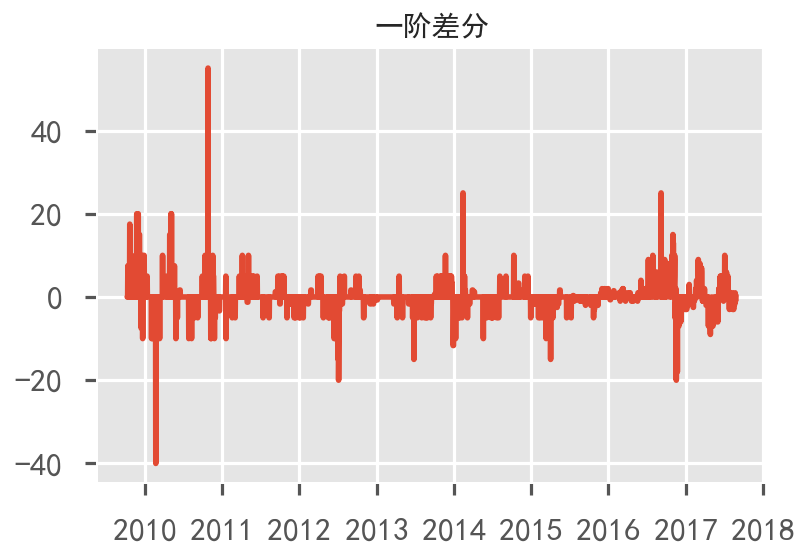

In [16]:
#一阶差分
stock_diff = ts_train.diff()
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

D:\work tools\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
D:\work tools\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


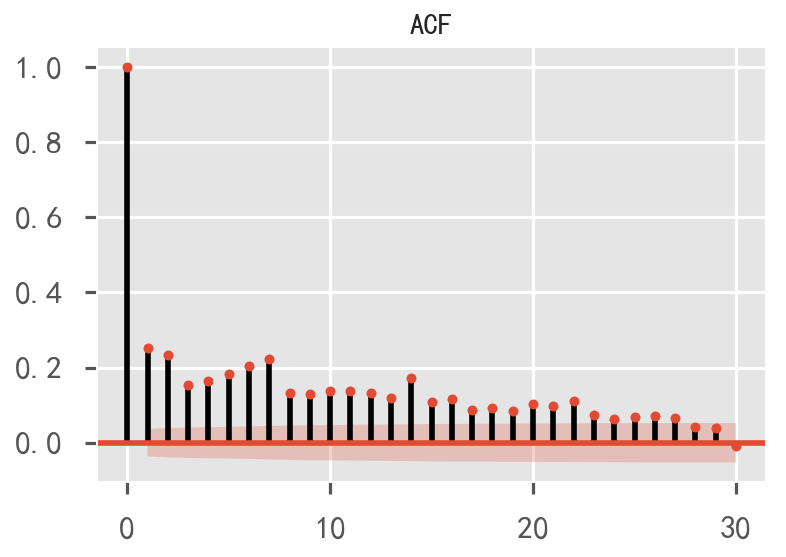

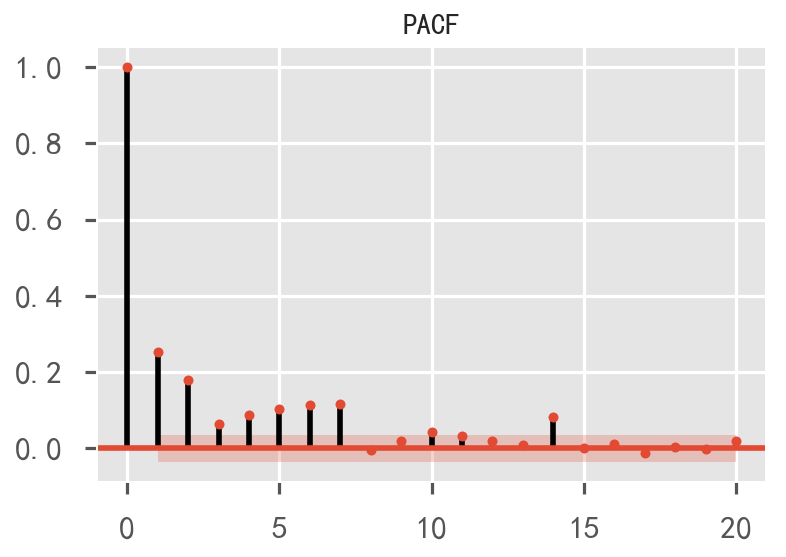

In [17]:
acf = plot_acf(stock_diff, lags=30)
plt.title("ACF")
acf.show()
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [18]:
ts=pd.DataFrame(ts_train).dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B78D672BE0>,
      dtype=object)

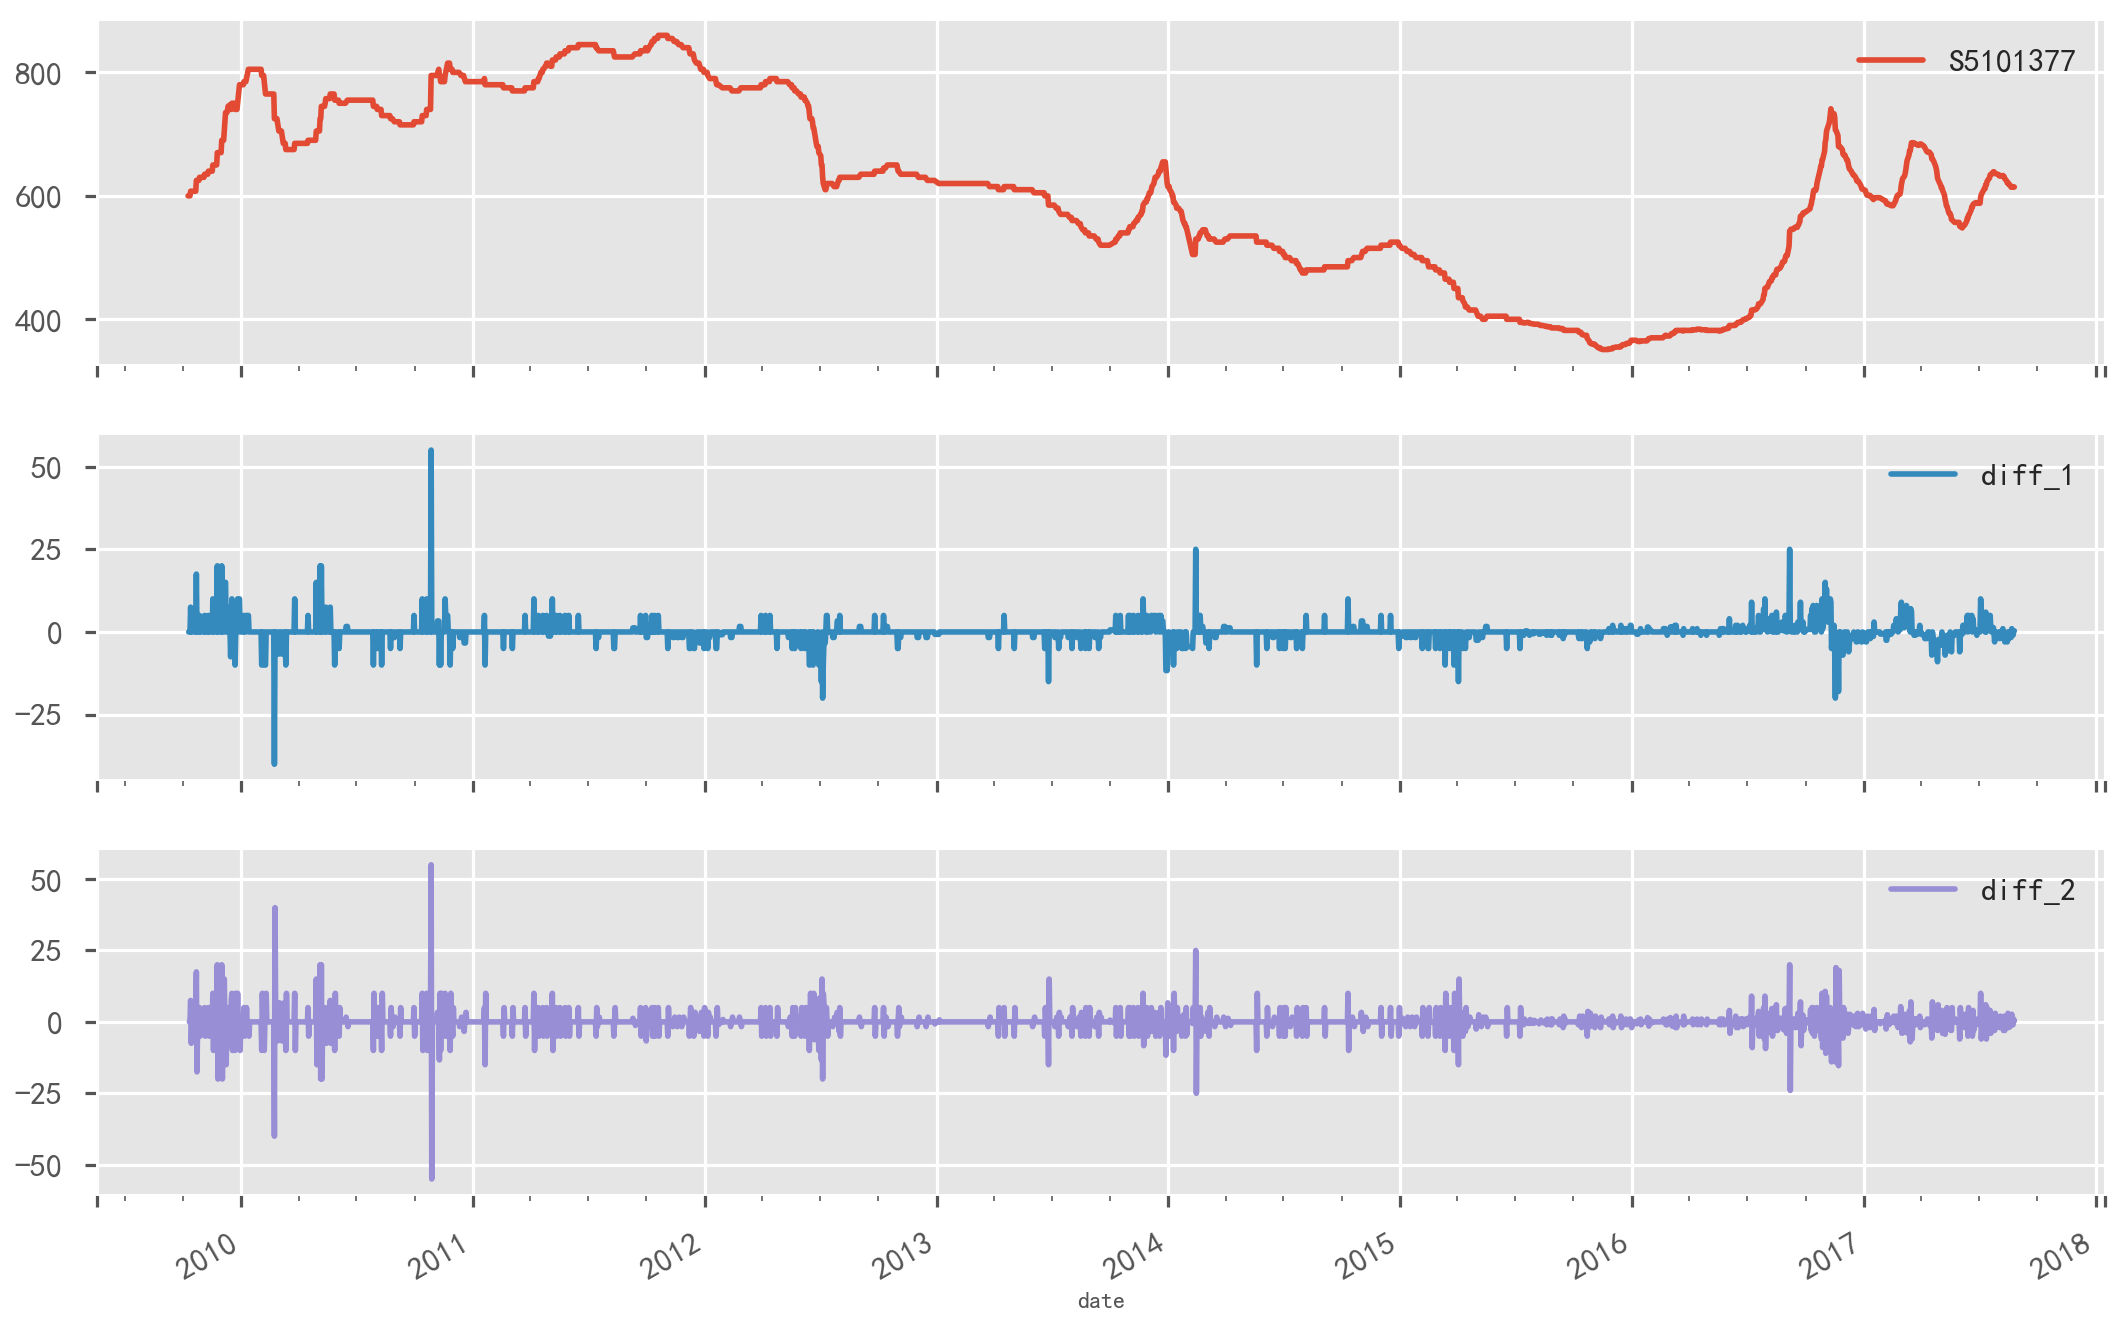

In [19]:
ts['diff_1'] = ts[select_name].diff(1)
ts['diff_2'] = ts['diff_1'].diff(1)
ts.plot(subplots=True, figsize=(18, 12))

In [20]:
del ts['diff_2']
del ts['diff_1']
print (type(ts))
ts=ts[100:500]
ts.head()

<class 'pandas.core.frame.DataFrame'>


,S5101377
date,
2010-01-17,805.00000
2010-01-18,805.00000
2010-01-19,805.00000
2010-01-20,805.00000
2010-01-21,805.00000


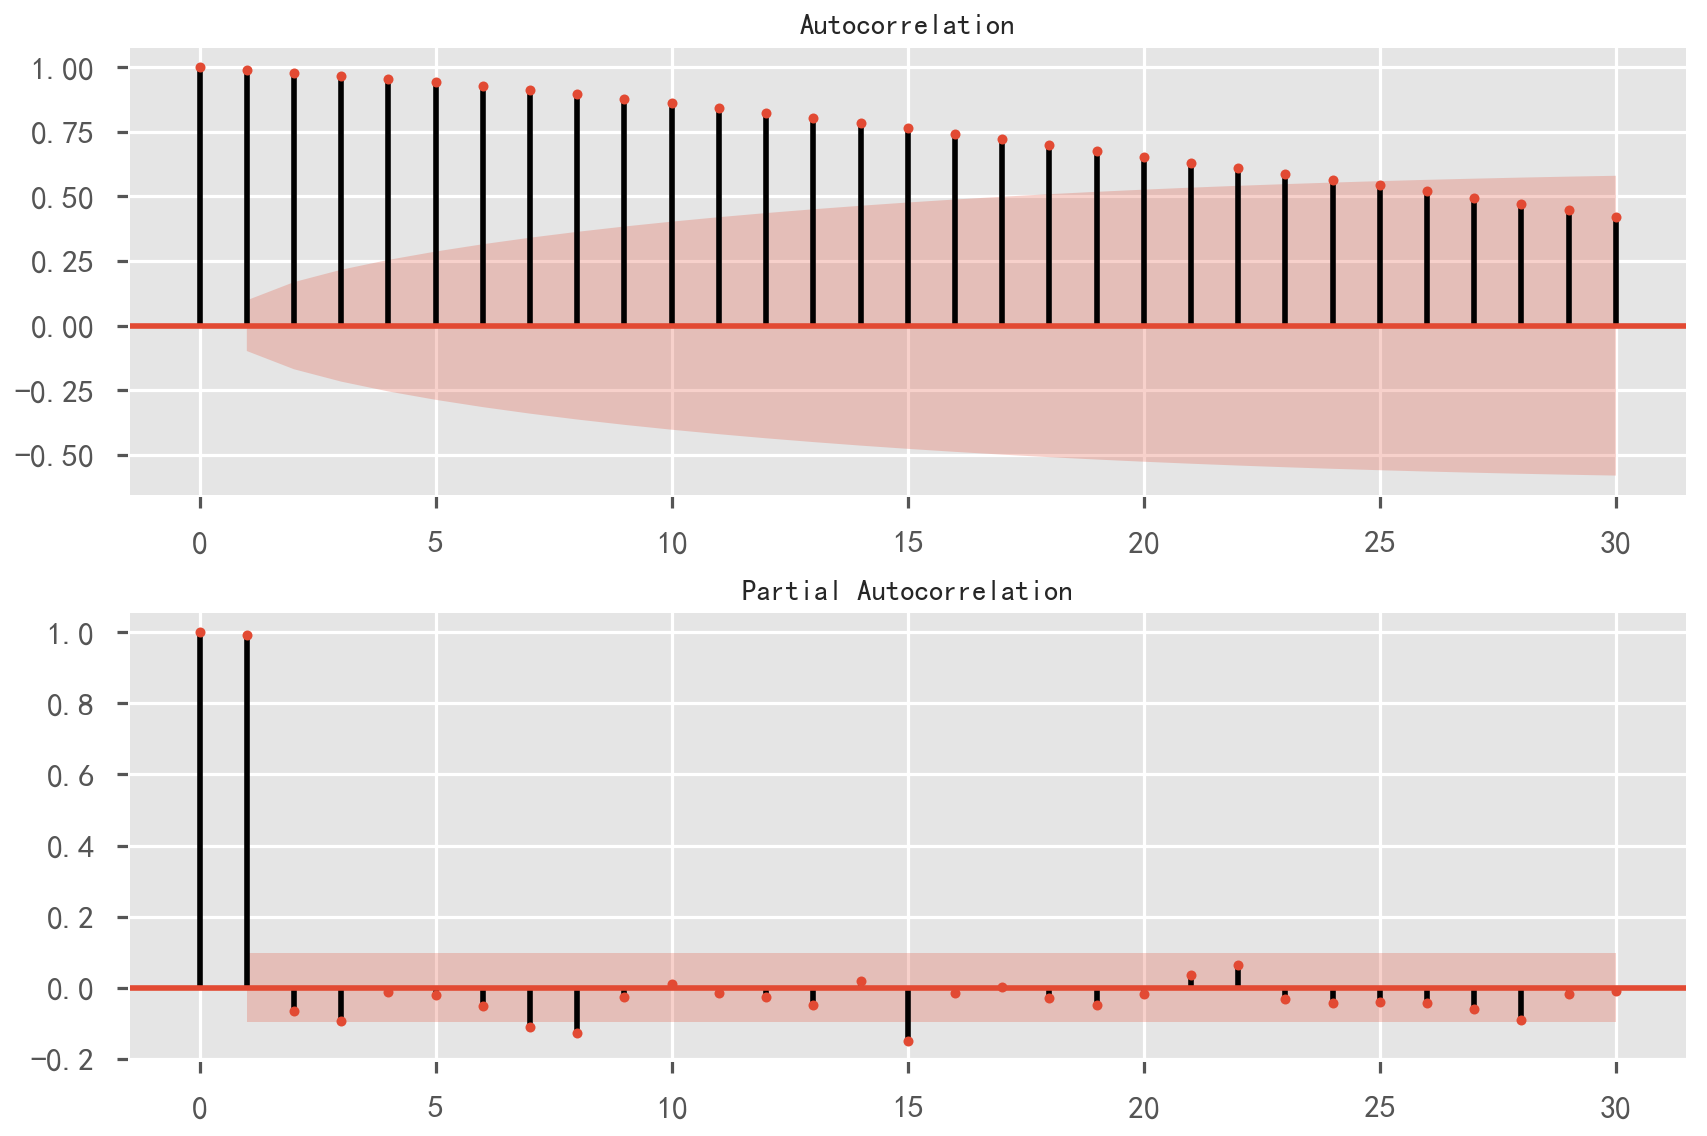

In [21]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=30,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=30, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

D:\work tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


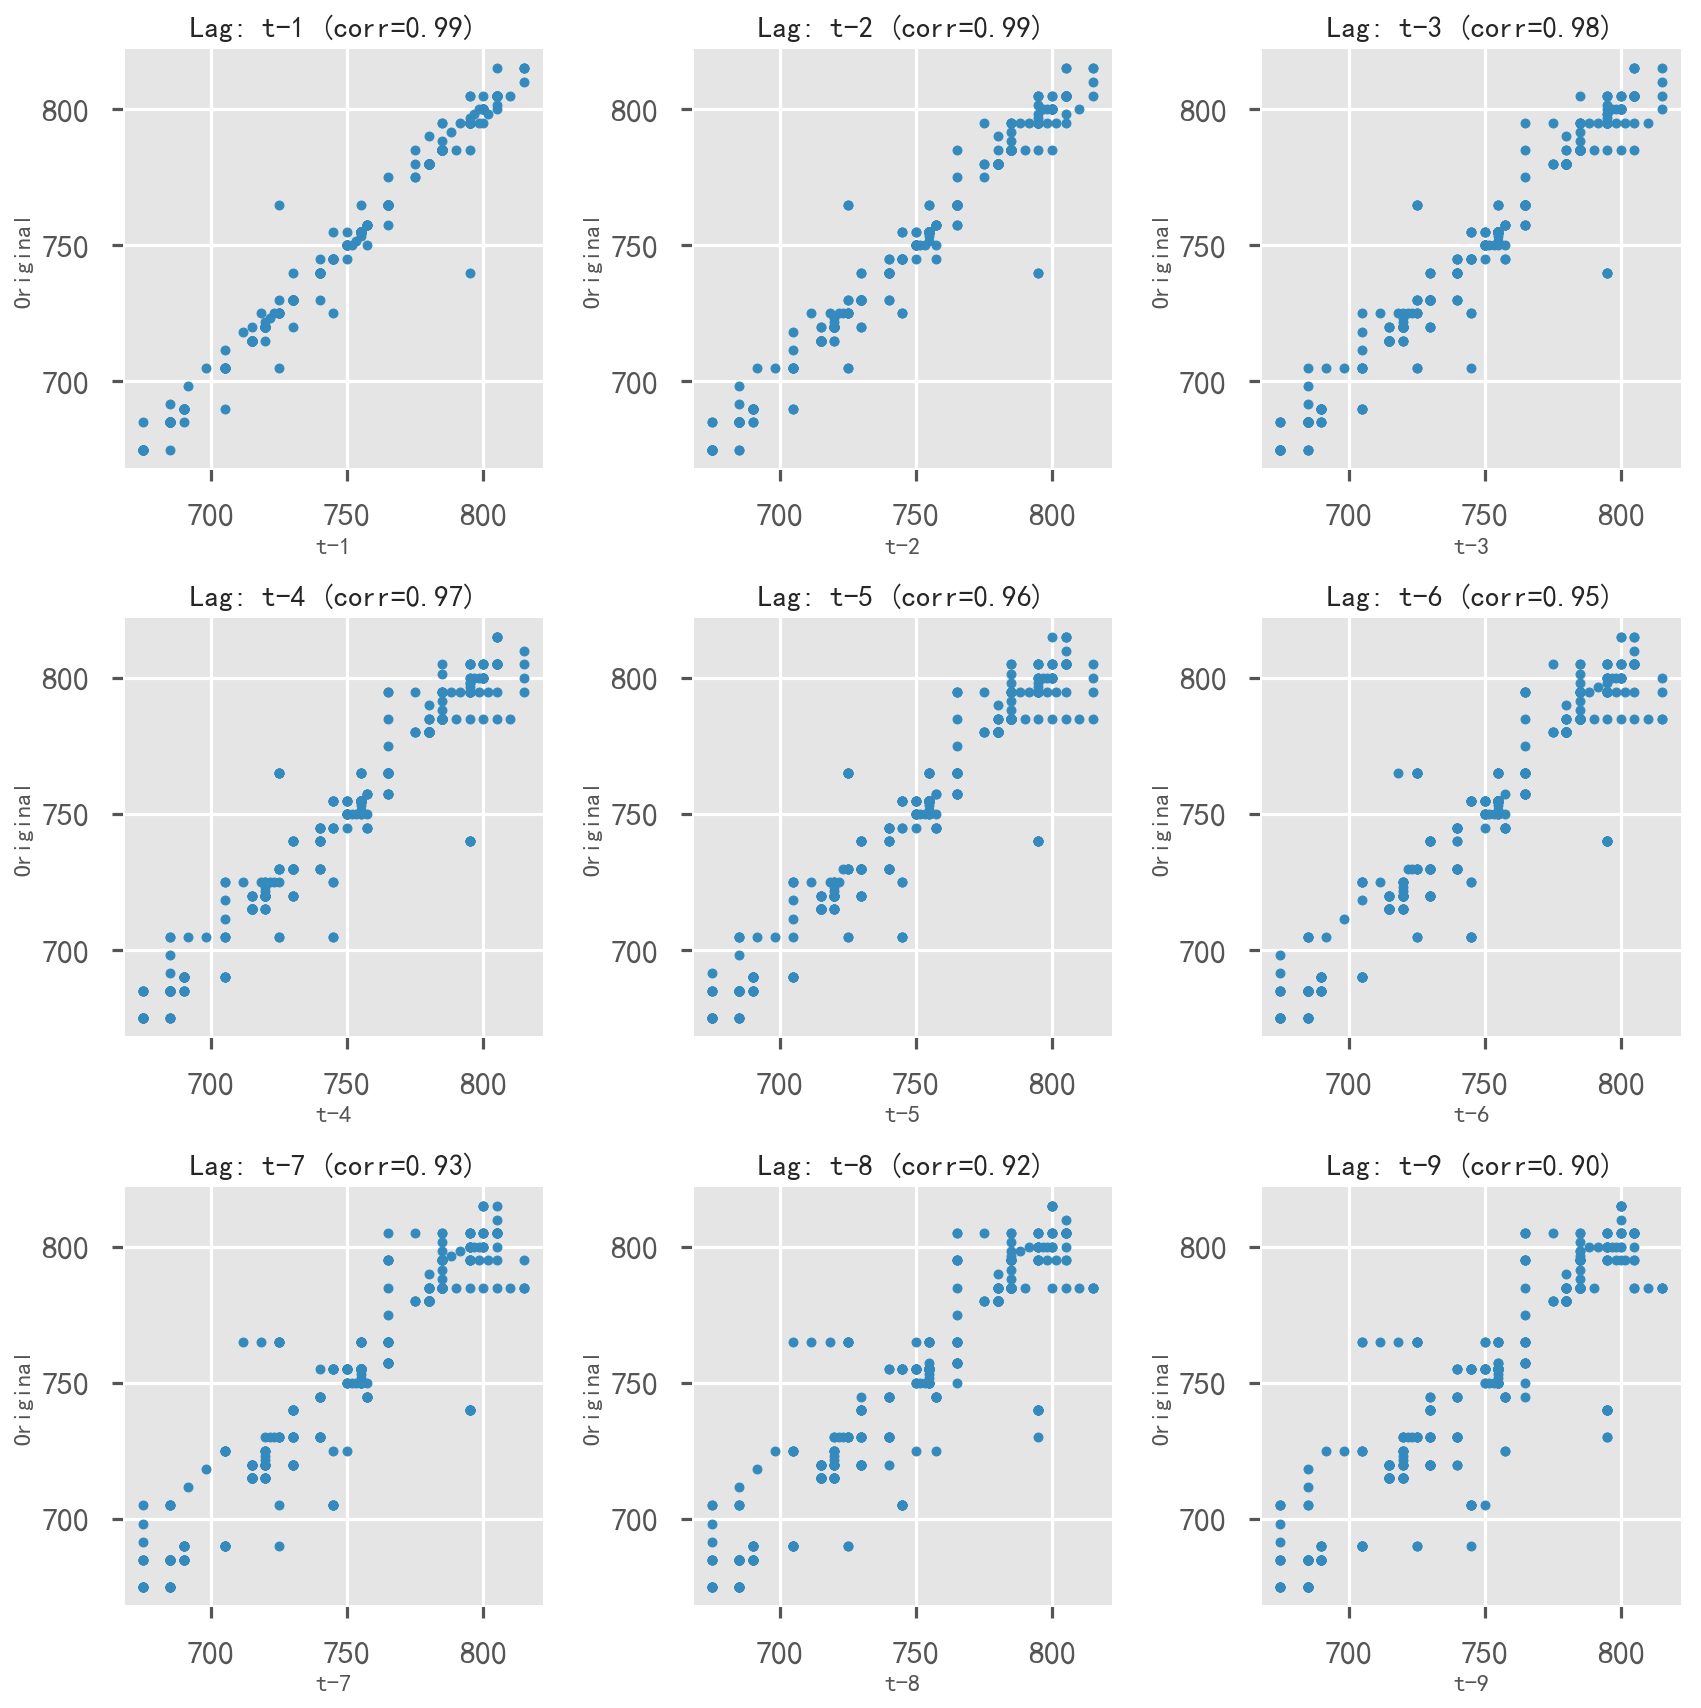

In [22]:
# 散点图表示相关
lags=9

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([ts, ts.shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

In [23]:
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(ts_train.values))

原始序列的ADF检验结果为： (-1.634921165712299, 0.4649158446379045, 14, 2864, {'1%': -3.432635324971202, '5%': -2.86254970084965, '10%': -2.5673074932947237}, 13592.71559730827)


In [24]:
#平稳性检测
print(u'差分序列的ADF检验结果为：', ADF(stock_diff)) 
from statsmodels.stats.diagnostic import acorr_ljungbox
print("--------------------------------------------------------")
#返回统计量和p值
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(ts_train, lags=1)) 

差分序列的ADF检验结果为： (-8.574669773720016, 8.022955585457458e-14, 13, 2864, {'1%': -3.432635324971202, '5%': -2.86254970084965, '10%': -2.5673074932947237}, 13589.607090319645)
--------------------------------------------------------
差分序列的白噪声检验结果为： (array([2880.88237]), array([0.]))


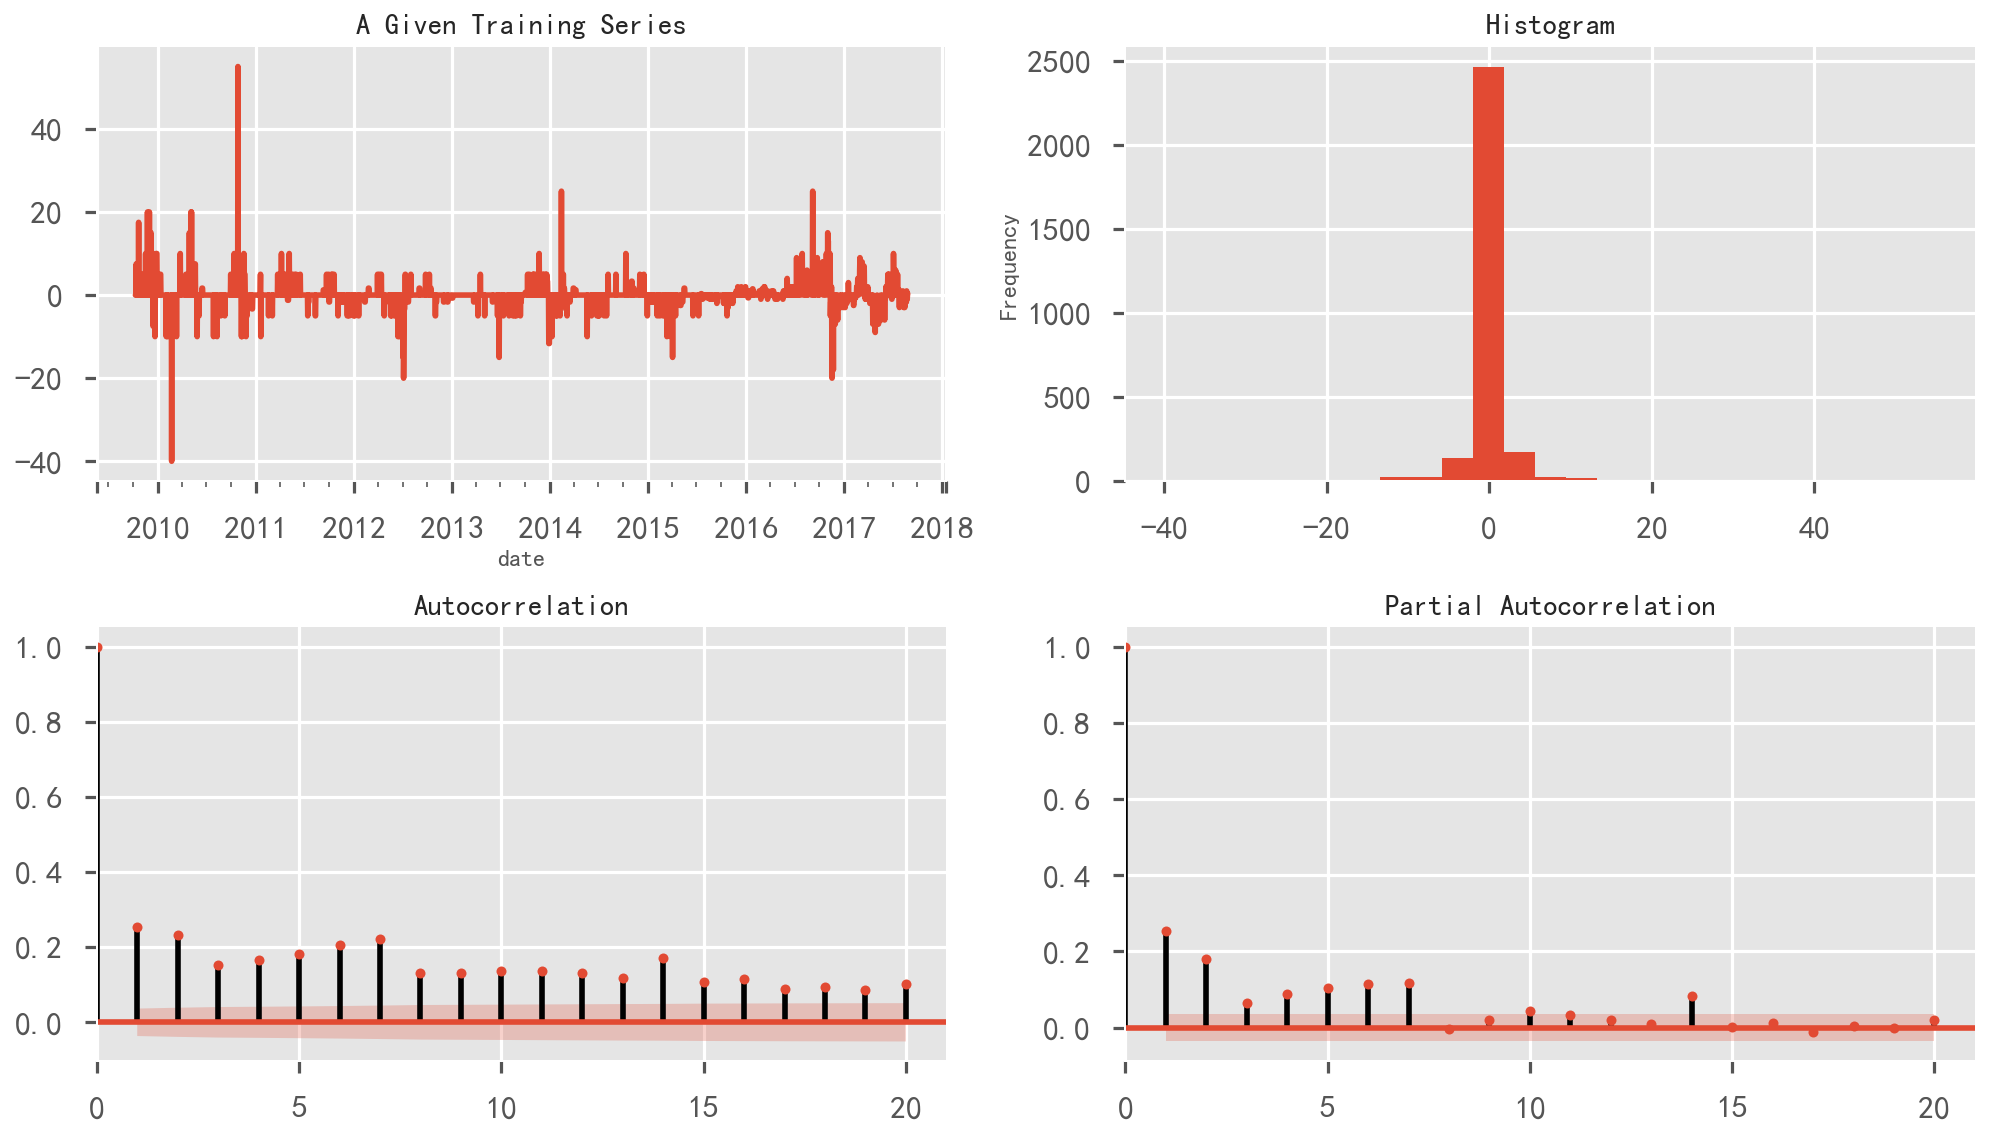

In [25]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax
tsplot(stock_diff, title='A Given Training Series', lags=20);

# 制作模型 寻找P Q值

In [26]:
#Model Estimation
# Fit the model
arima200 = sm.tsa.SARIMAX(ts_train, order=(2,0,0))
model_results = arima200.fit()

In [27]:
import itertools
p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 1
q_max = 4
# 初始化结果
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
results_aic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.SARIMAX(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
        results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
    except:
        continue

#可选择的模型选择方法，仅限于搜索AR和MA参数
train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
print('BIC', train_results.bic_min_order)
print('AIC', train_results.aic_min_order)

D:\work tools\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
D:\work tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\work tools\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\work tools\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\work tools\Anaconda3\lib\site-packages\statsmodels\

BIC (2, 1)
AIC (4, 4)


D:\work tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


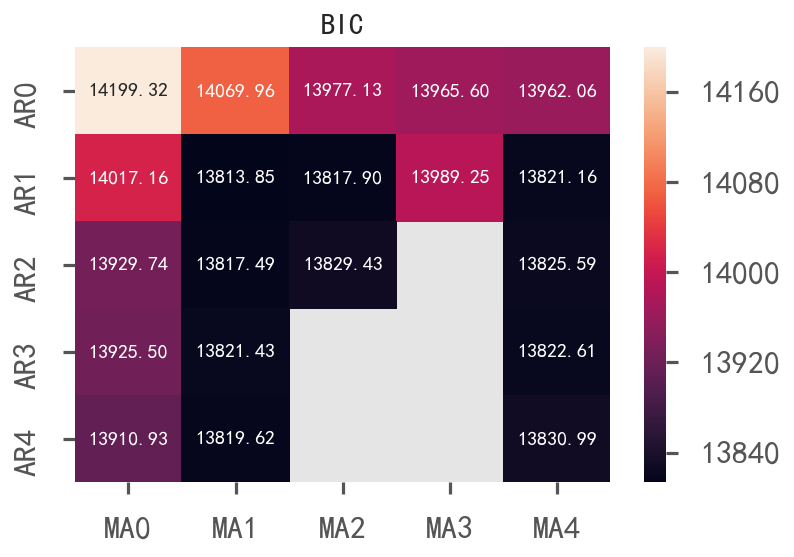

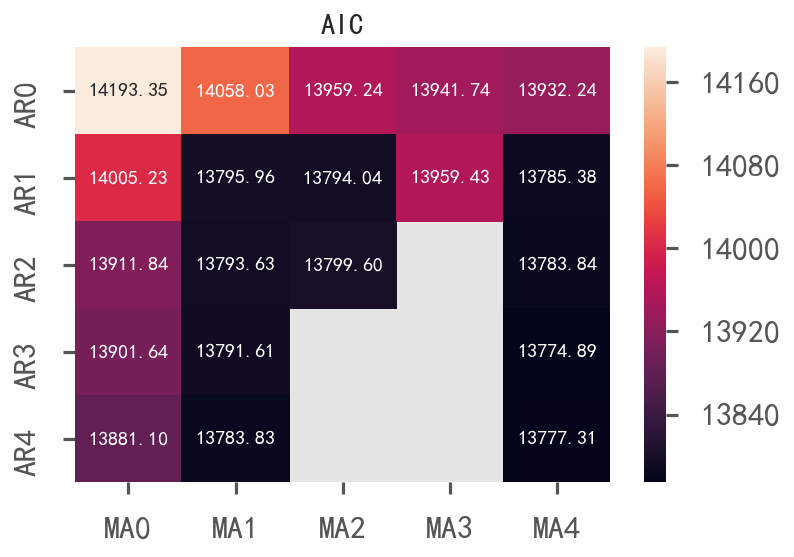

In [28]:
#BIC\AIC可视化
results_bic = results_bic[results_bic.columns].astype(float)
results_aic = results_aic[results_aic.columns].astype(float)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1 = sns.heatmap(results_aic,
                 mask=results_bic.isnull(),
                 ax=ax1,
                 annot=True,
                 fmt='.2f',
                 );
ax1.set_title('AIC');

In [29]:
pmax=4
qmax=4
#bic矩阵
bic_matrix = [] 
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
    #存在部分报错，所以用try来跳过报错。
        try: 
            tmp.append(ARIMA(ts_train, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
#从中可以找出最小值
bic_matrix = pd.DataFrame(bic_matrix) 
#先用stack展平，然后用idxmin找出最小值位置。
p,q = bic_matrix.stack().idxmin() 
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 

#aic矩阵
aic_matrix = [] 
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
    #存在部分报错，所以用try来跳过报错。
        try: 
            tmp.append(ARIMA(ts_train, (p,1,q)).fit().aic)
        except:
            tmp.append(None)
    aic_matrix.append(tmp)
#从中可以找出最小值
aic_matrix = pd.DataFrame(aic_matrix) 
#先用stack展平，然后用idxmin找出最小值位置。
p,q = aic_matrix.stack().idxmin() 
print(u'AIC最小的p值和q值为：%s、%s' %(p,q)) 

D:\work tools\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\work tools\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\work tools\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

BIC最小的p值和q值为：1、1
AIC最小的p值和q值为：3、4


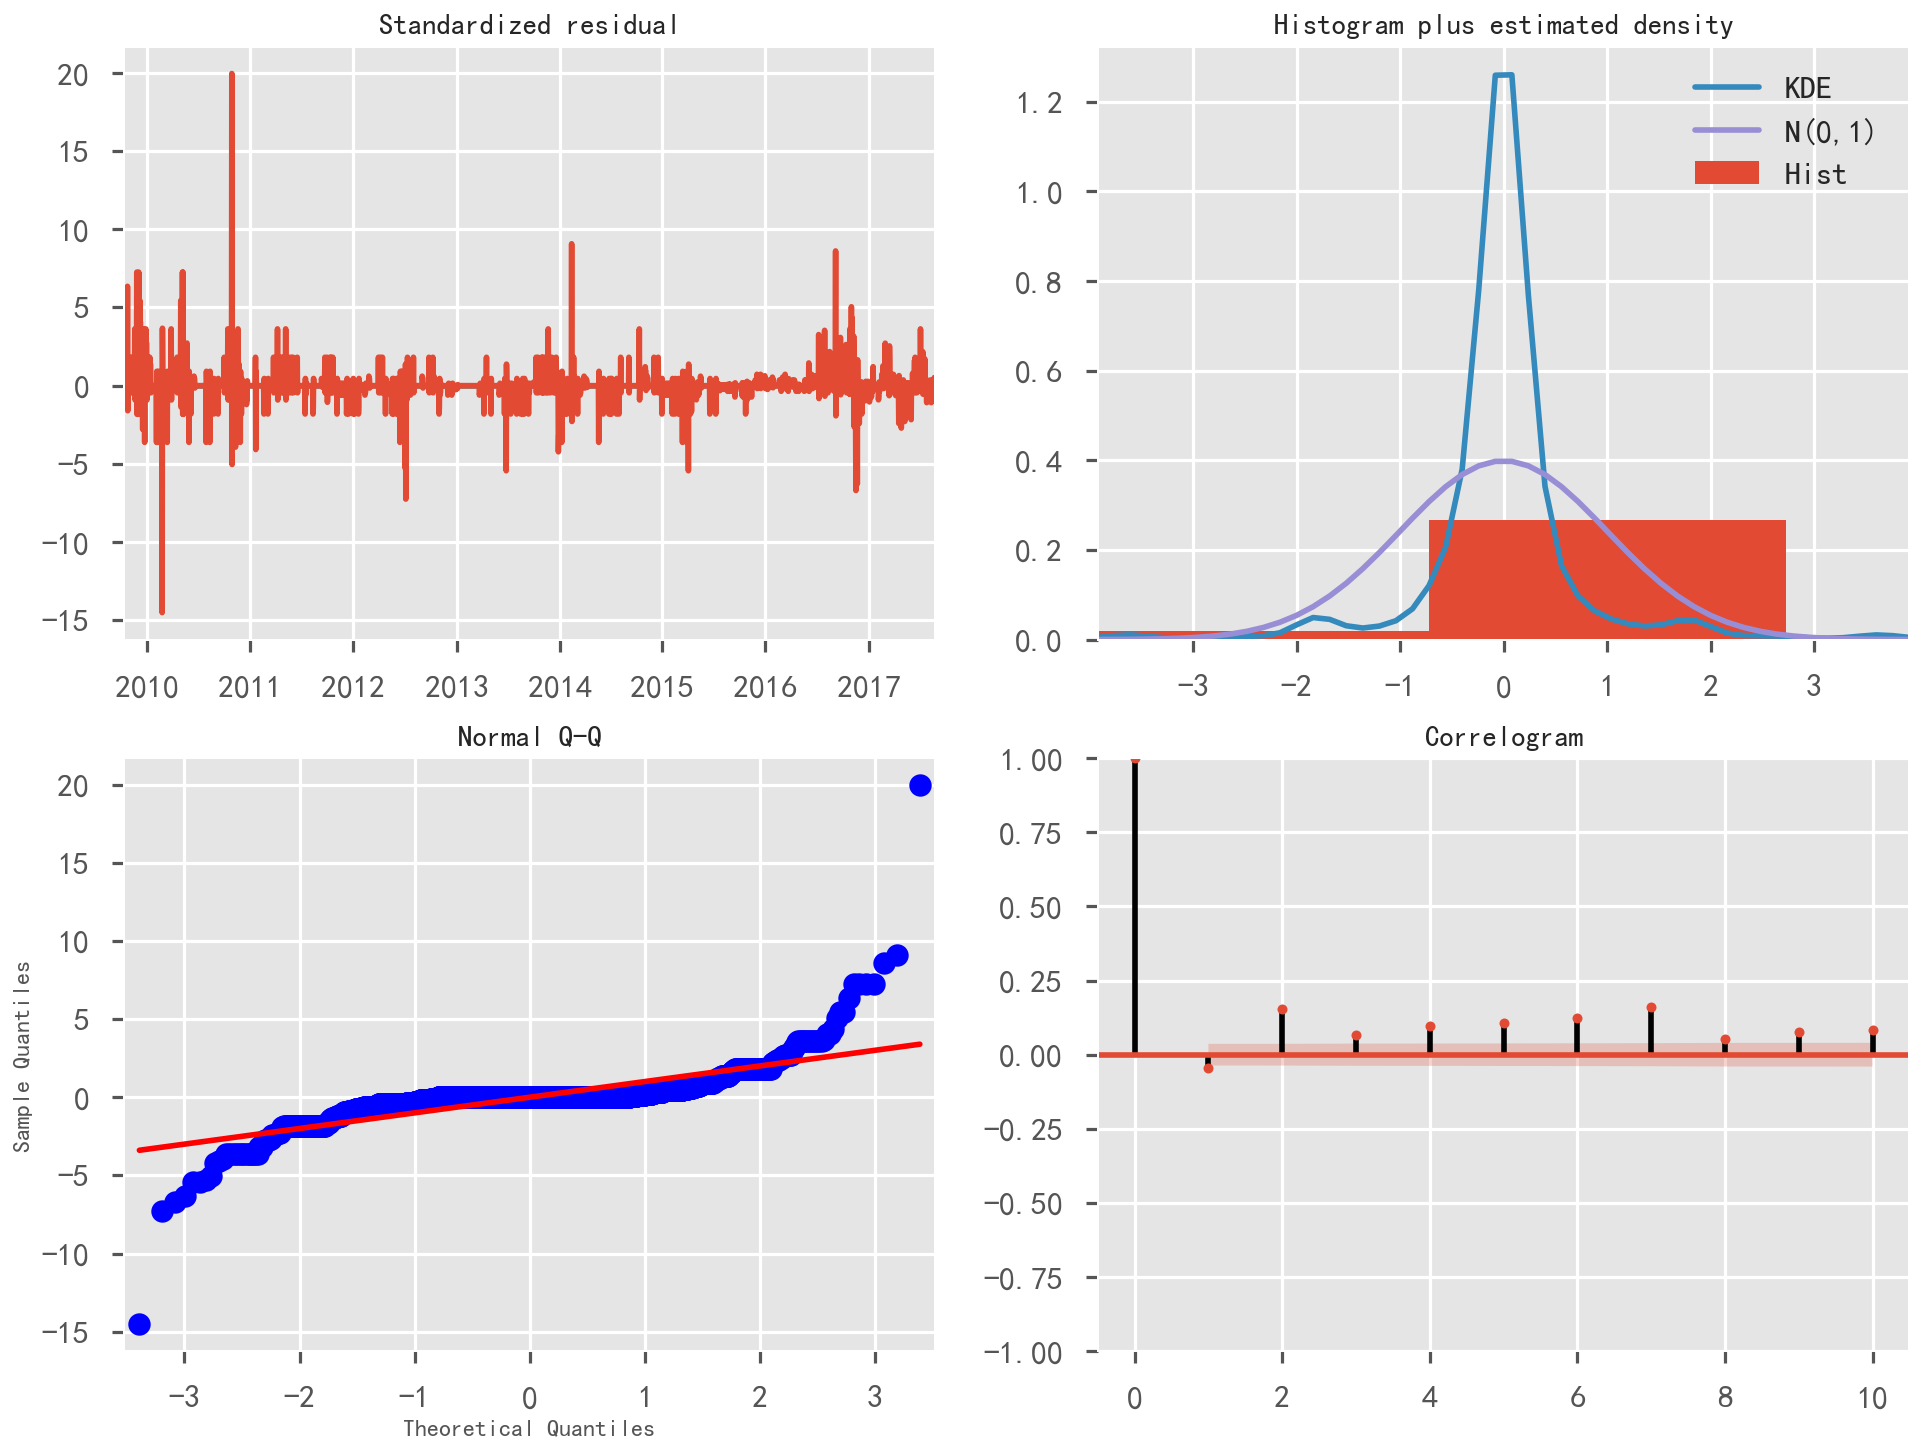

In [30]:
#残差分析 正态分布 QQ图线性
model_results.plot_diagnostics(figsize=(16, 12));

# 预测结果填入PQ值

方法1

Text(0.5,1,'差分趋势: nan')

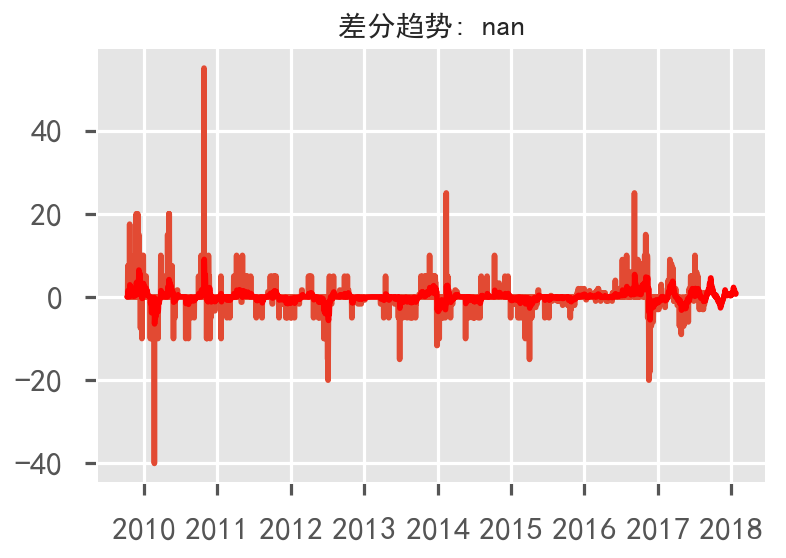

In [31]:
model = ARIMA(ts_all, order=(3, 1, 4),freq='D')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(stock_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('差分趋势: %.4f'% sum((results_ARIMA.fittedvalues-stock_diff)**2))

2018-01-24   739.89354
2018-01-25   740.68983
2018-01-26   741.23970
2018-01-27   741.70950
2018-01-28   742.24573
2018-01-29   742.85973
2018-01-30   743.46808
2018-01-31   743.99868
2018-02-01   744.44897
2018-02-02   744.86441
2018-02-03   745.28389
2018-02-04   745.71029
2018-02-05   746.12200
2018-02-06   746.50101
2018-02-07   746.84779
2018-02-08   747.17512
2018-02-09   747.49368
2018-02-10   747.80456
2018-02-11   748.10250
2018-02-12   748.38334
2018-02-13   748.64778
2018-02-14   748.89968
Freq: D, dtype: float64

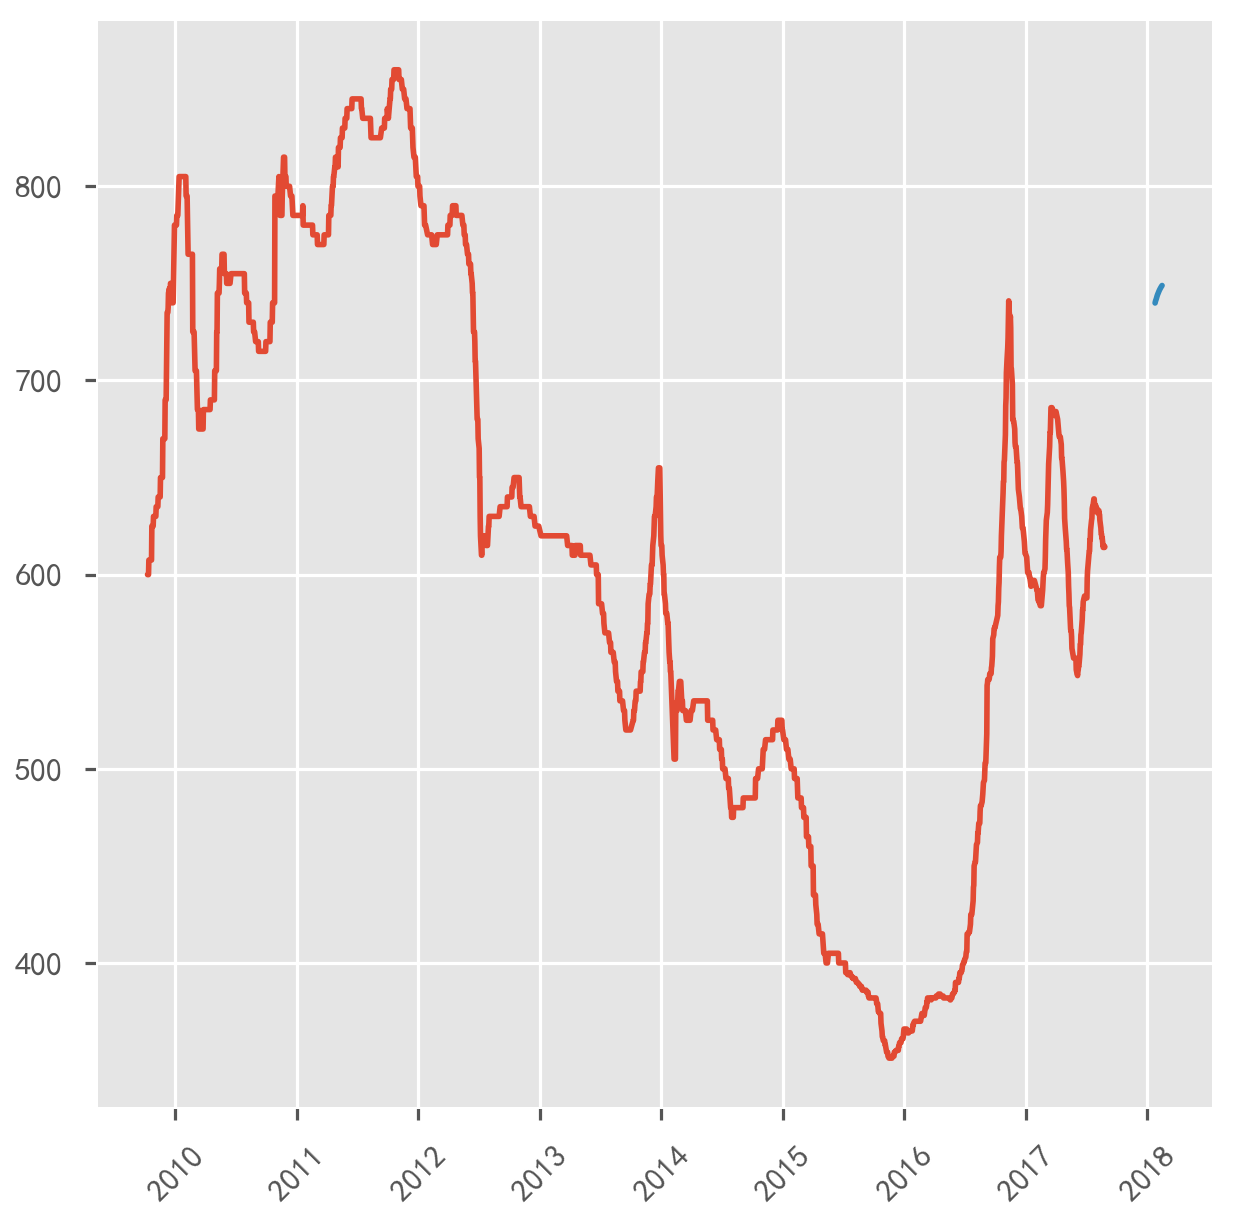

In [32]:
model = ARIMA(ts_all, order=(3, 1, 4),freq='D')
result = model.fit()
pred = result.predict('20180124', '20180214',dynamic=True, typ='levels')
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.plot(ts_train)
plt.plot(pred)
pred

方法2

In [33]:
model = ARIMA(ts_all, (3,1,4)).fit() 
model.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 14470.5868
Dependent Variable: D.S5101377       Log-Likelihood:      -7199.2   
Date:               2018-08-31 14:29 Scale:               1.0000    
No. Observations:   3029             Method:              css-mle   
Df Model:           8                Sample:              10-10-2009
Df Residuals:       3021                                  01-24-2018
Converged:          1.0000           S.D. of innovations: 2.606     
No. Iterations:     29.0000          HQIC:                14435.909 
AIC:                14416.4429                                      
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                0.0532   0.1631   0.3261 0.7444 -0.2665  0.3729
ar.L1.D.S5101377     1.7384   0.1561  11.1388 0.0000  1.4325  2.0443
ar.L2.D.S5101377    -1.3907   0.1998  -6.9591 0.0000 -1.7824 -0.9990
ar.L3.D.S5101377     0.6050   0.0780   7.7570 0.0000  0.4521  0.7578
ma.L1.D.S5101377    -1.5801   0.1559 -10.1373 0.0000 -1.8855 -1.2746
ma.L2.D.S5101377     1.2673   0.1691   7.4960 0.0000  0.9360  1.5987
ma.L3.D.S5101377    -0.5833   0.0631  -9.2384 0.0000 -0.7071 -0.4596
ma.L4.D.S5101377     0.0599   0.0204   2.9395 0.0033  0.0200  0.0998
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0593            -0.0000           1.0593            -0.0000
AR.2            0.6198            -1.0846           1.2492            -0.1674
AR.3            0.6198             1.0846           1.2492             0.1674
MA.1            1.2675            -0.0000           1.2675            -0.0000
MA.2            0.5908            -1.2073           1.3441            -0.1776
MA.3            0.5908             1.2073           1.3441             0.1776
MA.4            7.2944            -0.0000           7.2944            -0.0000
====================================================================

"""

In [34]:
model.forecast(3)[0][0]

739.6548070627742

方法3取PQ值并验证

In [35]:
# -*- coding: utf-8 -*-
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
import numpy as np
import pyflux as pf


daily_payment = pd.read_csv("data/aaa.csv",parse_dates=[0], index_col=0)

def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]


def best_diff(df, maxdiff = 8):
    p_set = {}
    for i in range(0, maxdiff):
        temp = df.copy() #每次循环前，重置
        if i == 0:
            temp['diff'] = temp[temp.columns[1]]
        else:
            temp['diff'] = temp[temp.columns[1]].diff(i)
            temp = temp.drop(temp.iloc[:i].index) #差分后，前几行的数据会变成nan，所以删掉
        pvalue = test_stationarity(temp['diff'])
        p_set[i] = pvalue
        p_df = pd.DataFrame.from_dict(p_set, orient="index")
        p_df.columns = ['p_value']
    i = 0
    while i < len(p_df):
        if p_df['p_value'][i]<0.01:
            bestdiff = i
            break
        i += 1
    return bestdiff


def produce_diffed_timeseries(df, diffn):
    if diffn != 0:
        df['diff'] = df[df.columns[1]].apply(lambda x:float(x)).diff(diffn)
    else:
        df['diff'] = df[df.columns[1]].apply(lambda x:float(x))
    df.dropna(inplace=True) #差分之后的nan去掉
    return df


def choose_order(ts, maxar, maxma):
    order = st.arma_order_select_ic(ts, maxar, maxma, ic=['aic', 'bic', 'hqic'])
    return order.bic_min_order


def predict_recover(ts, df, diffn):
    if diffn != 0:
        ts.iloc[0] = ts.iloc[0]+df['log'][-diffn]
        ts = ts.cumsum()
    ts = np.exp(ts)
#    ts.dropna(inplace=True)
    print('还原完成')
    return ts


def run_aram(df, maxar, maxma, test_size = 14):
    data = df.dropna()
    data['log'] = np.log(data[data.columns[0]])
    print(data)
    #    test_size = int(len(data) * 0.33)
    train_size = len(data)-int(test_size)
    train, test = data[:train_size], data[train_size:]
    if test_stationarity(train[train.columns[1]]) < 0.01:
        print('平稳，不需要差分')
    else:
        diffn = best_diff(train, maxdiff = 8)
        train = produce_diffed_timeseries(train, diffn)
        print('差分阶数为'+str(diffn)+'，已完成差分')
    print('开始进行ARMA拟合')
    order = choose_order(train[train.columns[2]], maxar, maxma)
    print('模型的阶数为：'+str(order))
    _ar = order[0]
    _ma = order[1]
    model = pf.ARIMA(data=train, ar=_ar, ma=_ma, target='diff', family=pf.Normal())
    model.fit("MLE")
    test = test['price']
    test_predict = model.predict(int(test_size))
    test_predict = predict_recover(test_predict, train, diffn)
    RMSE = np.sqrt(((np.array(test_predict)-np.array(test))**2).sum()/test.size)
    print("测试集的RMSE为："+str(RMSE))


In [36]:
run_aram(daily_payment, 5, 5, test_size = 14)

               price     log
date                        
2009-10-09 600.00000 6.39693
2009-10-10 600.00000 6.39693
2009-10-11 600.00000 6.39693
2009-10-12 600.00000 6.39693
2009-10-13 607.50000 6.40935
2009-10-14 607.50000 6.40935
2009-10-15 607.50000 6.40935
2009-10-16 607.50000 6.40935
2009-10-17 607.50000 6.40935
2009-10-18 607.50000 6.40935
2009-10-19 607.50000 6.40935
2009-10-20 607.50000 6.40935
2009-10-21 607.50000 6.40935
2009-10-22 625.00000 6.43775
2009-10-23 625.00000 6.43775
2009-10-24 625.00000 6.43775
2009-10-25 625.00000 6.43775
2009-10-26 625.00000 6.43775
2009-10-27 630.00000 6.44572
2009-10-28 630.00000 6.44572
2009-10-29 630.00000 6.44572
2009-10-30 630.00000 6.44572
2009-10-31 630.00000 6.44572
2009-11-01 630.00000 6.44572
2009-11-02 630.00000 6.44572
2009-11-03 630.00000 6.44572
2009-11-04 635.00000 6.45362
2009-11-05 635.00000 6.45362
2009-11-06 635.00000 6.45362
2009-11-07 635.00000 6.45362
2009-11-08 635.00000 6.45362
2009-11-09 635.00000 6.45362
2009-11-10 640